In [1]:
import torch
import torch.nn as nn
import numpy as np

Consider the following output of a model for a batch of size 3 and the corresponding true labels.

In [2]:
output = torch.tensor([
    [3.2, 1.3, 0.2, 0.8],
    [1.2, 4.1, 3.8, 0.1],
    [3.3, 2.5, 1.9, 5.9]
])

target = torch.tensor([0,2,3]).long()

--------------

[Softmax wikipedia link](https://en.wikipedia.org/wiki/Softmax_function)

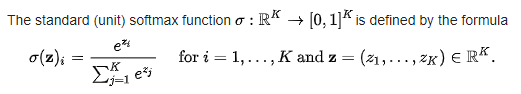

--------------

[Log Softmax pytorch documentation link](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html)
<br>
There are a number of advantages of using log softmax over softmax including practical reasons like improved [numerical performance](https://stats.stackexchange.com/questions/289369/log-probabilities-in-reference-to-softmax-classifier) and [gradient optimization](https://stats.stackexchange.com/questions/174481/why-to-optimize-max-log-probability-instead-of-probability). These advantages can be extremely important for implementation especially when training a model can be computationally challenging and expensive. At the heart of using log-softmax over softmax is the use of log probabilities over probabilities, which has nice information theoretic interpretations.

When used for classifiers the log-softmax has the effect of heavily penalizing the model when it fails to predict a correct class. Whether or not that penalization works well for solving your problem is open to your testing, so both log-softmax and softmax are worth using.

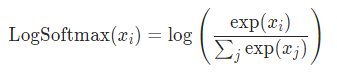

--------------
[Cross Entropy wikipedia link](https://en.wikipedia.org/wiki/Cross_entropy)

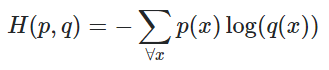

For single-label models CrossEntropy boils down to the following:
<br>
$\;L\; = - \sum\;Y\; \odot \;\log(\hat{\,Y\,})\;/\; batch\,size$ <br>

where $Y$ is a one-hot-encoded representation of the true labels of size $ (batch\,size \;\times\; number\,of\,classes)$ <br>
and $\hat{Y}$ is a matrix of the same shape as $Y$ containing the predicted probabilities output by the model (squeezed through a softmax).

#### The loss is then found by summing the elements of the resulting matrix $L$ and dividing with the number of data-instances of the batch (batch size).

--------------

In [3]:
def Softmax(x):
    return (torch.exp(x).T / torch.sum(torch.exp(x), axis=1).T).T

def logSoftmax(x):
    return torch.log(Softmax(x))

def CrossEntropy(Q, P):
    batch_size = Q.shape[0]
    num_of_classes = Q.shape[1]
    P = torch.eye(num_of_classes)[P]
    loss = - torch.sum(P * torch.log(Q)) / batch_size
    return loss.item()

In [4]:
probs = Softmax(output)
print(f'Probabilities:\n{probs}')

log_probs = logSoftmax(output)
print(f'\nLog probabilities:\n{log_probs}')

loss = CrossEntropy(probs, target)
print(f'\nCrossEntropy loss:\n{loss}')

Probabilities:
tensor([[0.7751, 0.1159, 0.0386, 0.0703],
        [0.0303, 0.5512, 0.4084, 0.0101],
        [0.0660, 0.0296, 0.0163, 0.8881]])

Log probabilities:
tensor([[-0.2547, -2.1547, -3.2547, -2.6547],
        [-3.4956, -0.5956, -0.8956, -4.5956],
        [-2.7186, -3.5186, -4.1186, -0.1186]])

CrossEntropy loss:
0.42298611998558044


--------
### Comparing with pytorch's functions

'nn.CrossEntropyLoss' takes in the raw output of the model and the target classes. The output is pushed through a softmax and then CrossEntropy is calculated

In [5]:
criterion = nn.CrossEntropyLoss()
criterion(output, target)

tensor(0.4230)

The exact same result is obtained by passing in the log probabilities (logsoftmax) into Negative Log Likelihood function 'nn.NLLLoss'

In [6]:
nll = nn.NLLLoss()
nll(log_probs, target)

tensor(0.4230)